In [1]:
#Importing The Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from sklearn import *
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import matplotlib.pyplot as pyplot

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
f=pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [6]:
f.head()

,YrSold,SalePrice
0,2006,139400
1,2007,150000
2,2008,200000
3,2009,230000
4,2010,250000


In [7]:
f.tail()

,YrSold,SalePrice
5,2011,280000
6,2012,300000
7,2013,320000
8,2014,340000
9,2015,350000


In [8]:
f.isnull().sum()

YrSold       0
SalePrice    0
dtype: int64

In [9]:
f.shape

(10, 2)

<ipython-input-10-2fa2c6f5e75b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YrSold',y='SalePrice',data=q,ci=None,palette='hot',edgecolor='red',lw=3).set(title='Top 5 Sales');


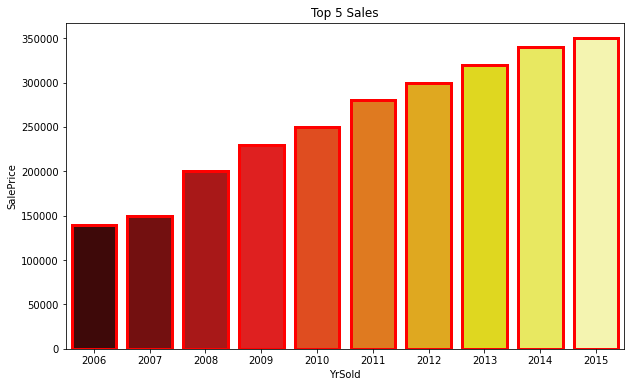

In [10]:
q=f.iloc[0:10]
sns.barplot(x='YrSold',y='SalePrice',data=q,ci=None,palette='hot',edgecolor='red',lw=3).set(title='Top 5 Sales');

In [11]:
f['SalePrice'].value_counts()

139400    1
150000    1
200000    1
230000    1
250000    1
280000    1
300000    1
320000    1
340000    1
350000    1
Name: SalePrice, dtype: int64

In [12]:
# Scatter and density plots
def plotScatterMatrix(f, plotSize, textSize):
    df = f.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-12-e8e3e4baa697>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


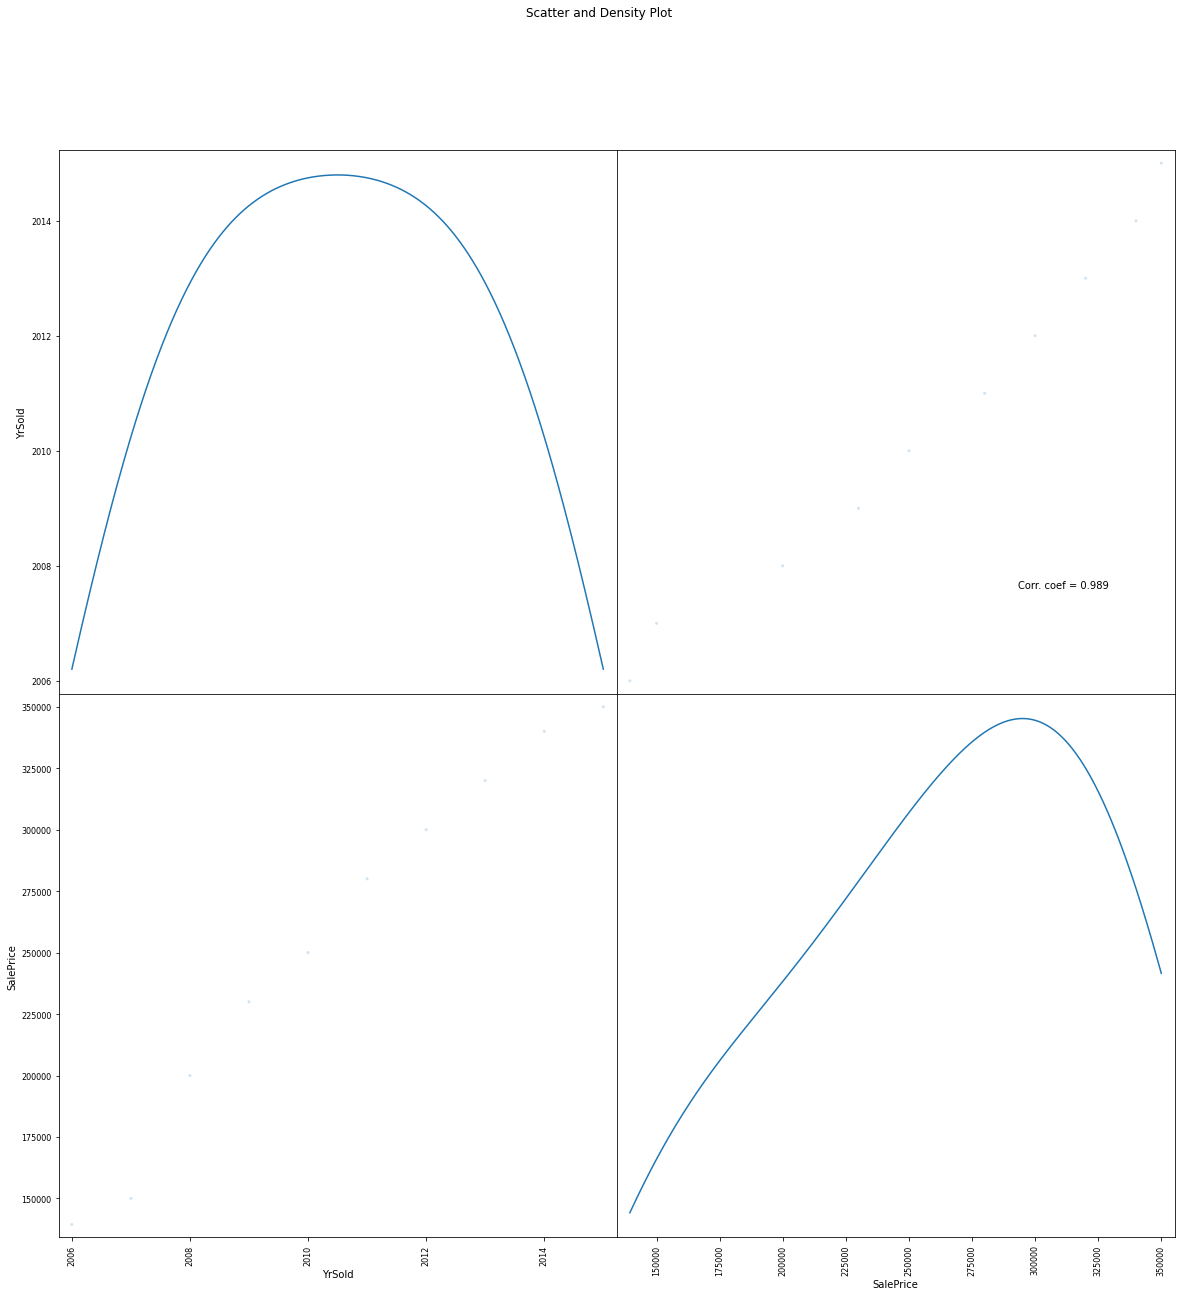

In [13]:
plotScatterMatrix(f, 20,10)

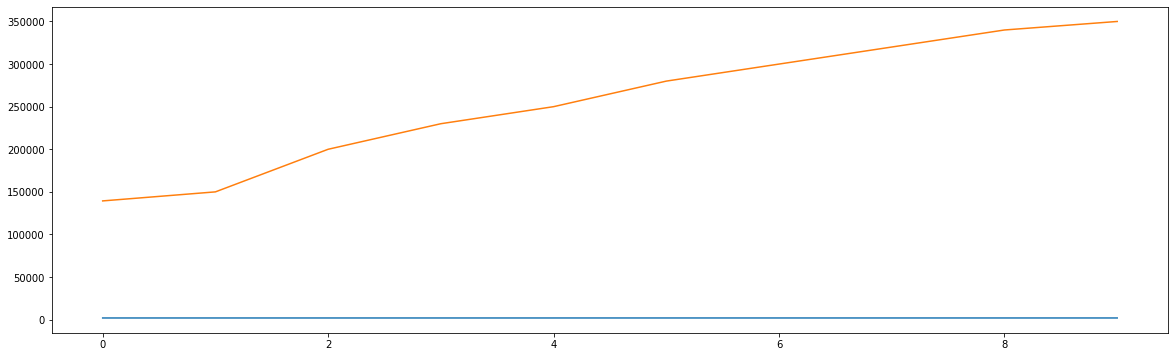

In [14]:
plt.figure(figsize=(20,6))
plt.plot(f.values)
plt.show()

In [15]:
x=f.iloc[:, :1].values.reshape(-1,1)
y=f.iloc[:, -1].values.reshape(-1,1)

In [16]:
x

array([[2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015]])

In [17]:
y

array([[139400],
       [150000],
       [200000],
       [230000],
       [250000],
       [280000],
       [300000],
       [320000],
       [340000],
       [350000]])

In [18]:
f= f[['YrSold','SalePrice']].reset_index().sort_values(by=['YrSold','index'])
f.head()

,index,YrSold,SalePrice
0,0,2006,139400
1,1,2007,150000
2,2,2008,200000
3,3,2009,230000
4,4,2010,250000


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [21]:
print(x.shape,x_test.shape,x_train.shape)

(10, 1) (3, 1) (7, 1)


In [22]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# import sklearn
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
accuracy= model.score(x_train,y_train)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_test)
x_test=scaler.transform(x_test)

In [26]:
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy= model.score(x,y)
print('Accuracy Of Linear Regression is :',round(accuracy*100,3))

Accuracy Of Linear Regression is : 99.314


In [27]:
#Prediction
years=0
print(f'Prediction -Morality Rate Of World {2015+years} will be:',end=' ')
print(model.predict(poly.fit_transform([[2015+years]])))

Prediction -Morality Rate Of World 2015 will be: [[352560.00000763]]


In [28]:
#dumping a data
from joblib import dump
dump(model,"project boston house price.joblib")

['project boston house price.joblib']

In [29]:
import pickle
pickle.dump(model,open('model1.sav','wb'))